## Imports

In [1]:
#Import calls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## CSV Files

In [2]:
#Bring the data in for EDA
obs = pd.read_csv('observations.csv')
spec = pd.read_csv('species_info.csv')

## Observations: Initial Data Set Review

In [3]:
#Observations basic info print out
print('\n\033[1mFirst 10 rows of data\033[0m')
print(obs.head(10))

print('\n\033[1mThis table has {} rows\033[0m'.format(len(obs)))

print('\n\033[1mObservations column stats\033[0m')
print(obs.describe())

print('\n\033[1mData Types in the table\033[0m')
print(obs.dtypes)

print('\n\033[1mThere are {} entries missing from this table\033[0m'.format(obs.isnull().sum().sum()))


First 10 rows of data
                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6  

## Species: Initial Data Set Review

In [4]:
#Species basic info print out
print('\n\033[1mFirst 10 rows of data\033[0m')
print(spec.head(10))

print('\n\033[1mThis table has {} rows\033[0m'.format(len(spec)))

print('\n\n\033[1mObservations column stats:\033[0m\n')
print(spec.describe())

print('\n\n\033[1mData Types in the table\033[0m\n')
print(spec.dtypes)

print('\n\n\033[1mThere are {} entries missing from this table\033[0m\n'.format(spec.isnull().sum().sum()))
print(spec.isnull().sum())

#Blanks for the isnull are just not endangered, so I'll add a category in to cover for this
spec['conservation_status'].fillna('Not Endangered', inplace=True)


First 10 rows of data
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
5                              

## Scope of Analysis

Missing Data
- [x] Analyze data subsets to ensure no issues with naming convention / pending corrections are present
- [x] Determine the nature of the missing data within Species_Info table, and if any backfilling can be provided without effect on the overall dataset
- [x] Merge Tables into a single data set
- [x] Compare category counts per park
- [x] Compare conservation status spread accross parks and types
- [x] Compare spread of species that are in Threatened Status

## Observations: Data Set Analysis


Count of observations per park
Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64


Grouped totals of observations per park
                             park_name  observations
0                  Bryce National Park        576025
1  Great Smoky Mountains National Park        431820
2            Yellowstone National Park       1443562
3               Yosemite National Park        863332



<class 'pandas.core.frame.DataFrame'>


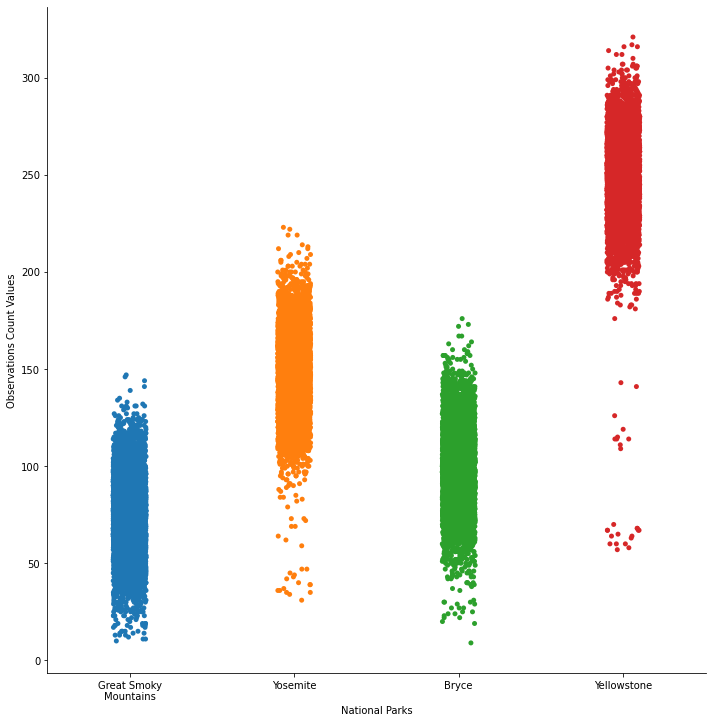

<Figure size 432x288 with 0 Axes>

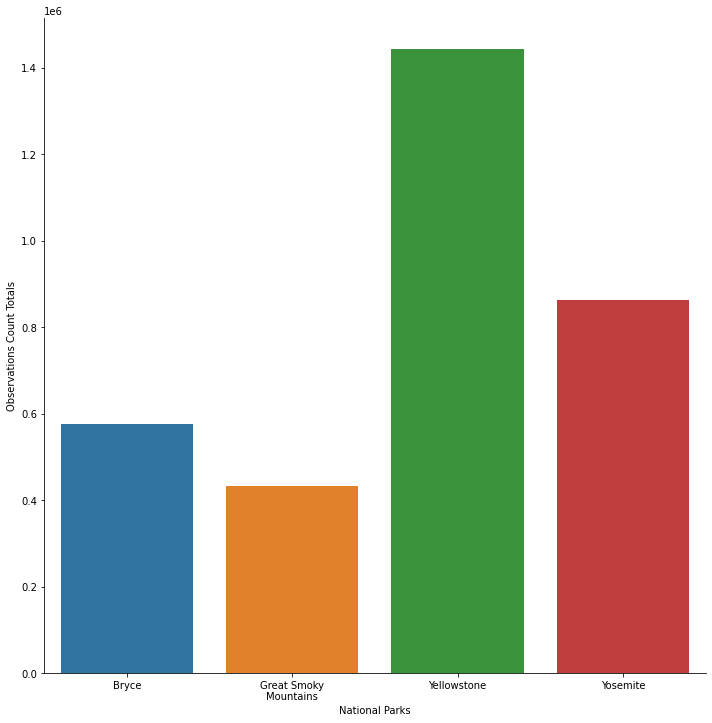

<Figure size 432x288 with 0 Axes>

In [5]:
#How many of each park are present
print('\n\033[1mCount of observations per park\033[0m')
print(obs.park_name.value_counts())

#Let's make a quick pivot to total the observations
print('\n\n\033[1mGrouped totals of observations per park\033[0m')
obs_noname = obs.drop(axis=1, labels=['scientific_name'])
obs_counts_park = obs_noname.groupby(['park_name']).sum().reset_index()
print(obs_counts_park)
print('\n\n')
print(type(obs_counts_park))


#Scatter Plot picture of the observations
g = sns.catplot(x='park_name', y='observations', data=obs, height = 10)
g.set_axis_labels("National Parks", "Observations Count Values")
g.set_xticklabels(['Great Smoky\nMountains', 'Yosemite', 'Bryce', 'Yellowstone'])
plt.show()
plt.clf()

#Category bar plot picture of the observations
g = sns.catplot(x='park_name', y='observations', kind='bar', data=obs_counts_park, height = 10)
g.set_axis_labels("National Parks", "Observations Count Totals")
g.set_xticklabels(['Bryce', 'Great Smoky\nMountains', 'Yellowstone', 'Yosemite'])
plt.show()
plt.clf()

Some Conclusions:
- Yellowstone clearly has the most observations by total count
- Great Smoky Mountains have the lowest observations by total count
- Yosimete has the highest observation counts per instance on average
- Great Smoky Mountains have the lowest observation counts per instance on average

## Species: Analysis of the Conservation Status by Category Type

In [6]:
#How many entries per category
#print('\033[1mBreakdown of category types in Species Data\033[0m\n')
#print(spec.groupby(['category', 'conservation_status']).count())

simp_spec = spec.drop(axis=1, labels=['common_names'])

print(pd.pivot_table(simp_spec, index='category', columns='conservation_status', aggfunc = 'count', fill_value=0))

#print('\n\n\033[1mBreakdown of conservation types in Species Data\033[0m\n')
#print(spec.conservation_status.value_counts())




#Note: Missing endangered status are due to species not being endangered. I will add an additional category 'Not Endangered' for the blanks

                    scientific_name                             \
conservation_status      Endangered In Recovery Not Endangered   
category                                                         
Amphibian                         1           0             73   
Bird                              4           3            442   
Fish                              3           0            116   
Mammal                            7           1            176   
Nonvascular Plant                 0           0            328   
Reptile                           0           0             74   
Vascular Plant                    1           0           4424   

                                                   
conservation_status Species of Concern Threatened  
category                                           
Amphibian                            4          2  
Bird                                72          0  
Fish                                 4          4  
Mammal                     

## Merging of the tables

In [7]:
#Now we will merge the tables
merged_df = obs.merge(spec,on='scientific_name', how='outer')
print(merged_df.columns)

#Some additional data management: shortening the park names
merged_df['park_name'] = merged_df['park_name'].str.strip('National Park')

Index(['scientific_name', 'park_name', 'observations', 'category',
       'common_names', 'conservation_status'],
      dtype='object')


## Charts with combined data

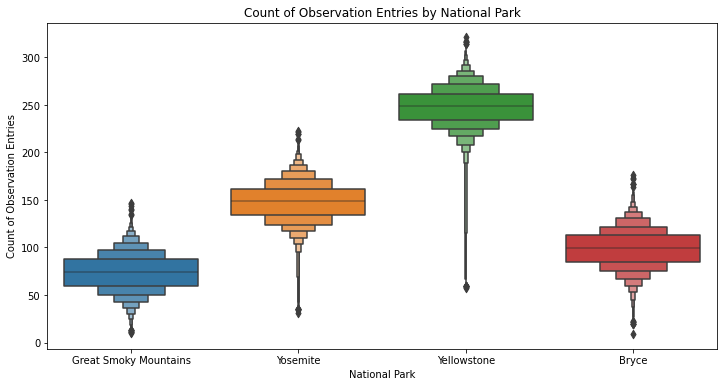

<Figure size 432x288 with 0 Axes>

In [8]:
#Distribution of Observations by National Park
plt.figure(figsize=(12, 6))
g = sns.boxenplot(x='park_name', y='observations', data=merged_df)
plt.xlabel('National Park')
plt.ylabel('Count of Observation Entries')
plt.title('Count of Observation Entries by National Park')
plt.show()
plt.clf()

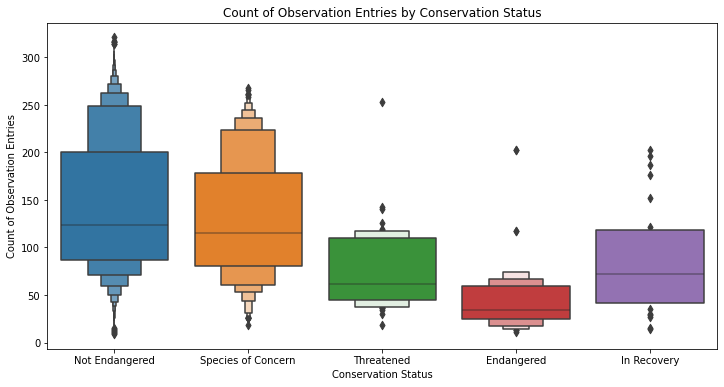

<Figure size 432x288 with 0 Axes>

In [9]:
#Distribution of Conservation Status by National Park
plt.figure(figsize=(12, 6))
g = sns.boxenplot(x='conservation_status', y='observations', data=merged_df)
plt.xlabel('Conservation Status')
plt.ylabel('Count of Observation Entries')
plt.title('Count of Observation Entries by Conservation Status')
plt.show()
plt.clf()

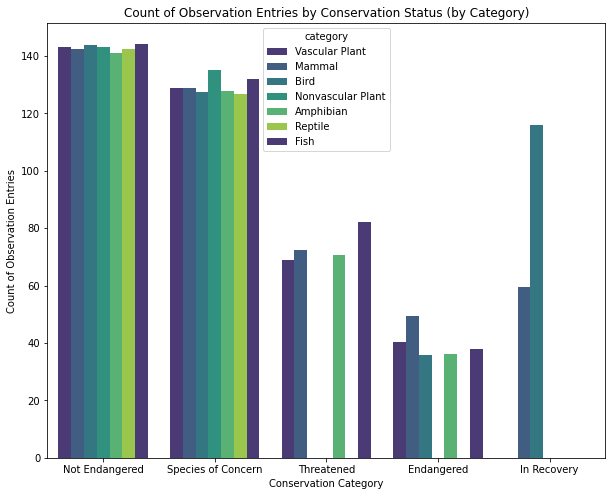

<Figure size 432x288 with 0 Axes>

In [10]:
#Distribution of Observations by Category
plt.figure(figsize=(10, 8))
g = sns.barplot(x='conservation_status', y='observations', hue='category', data=merged_df, ci=None, palette=sns.color_palette("viridis"))
plt.xlabel('Conservation Category')
plt.ylabel('Count of Observation Entries')
plt.title('Count of Observation Entries by Conservation Status (by Category)')
plt.show()
plt.clf()

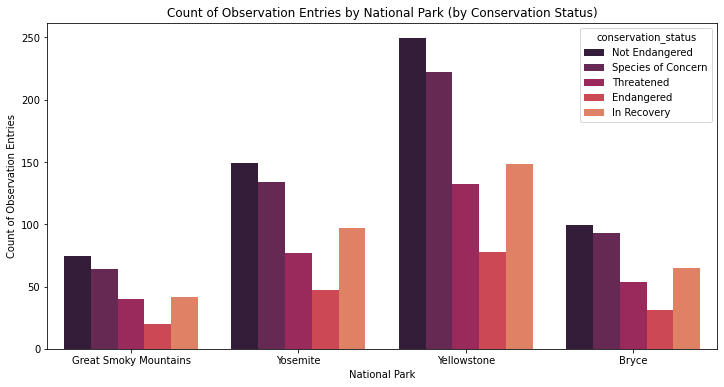

<Figure size 432x288 with 0 Axes>

In [11]:
#Distribution of Observations by National Park
plt.figure(figsize=(12, 6))
g = sns.barplot(x='park_name', y='observations', hue='conservation_status', data=merged_df, ci=None, palette=sns.color_palette("rocket"))
plt.xlabel('National Park')
plt.ylabel('Count of Observation Entries')
plt.title('Count of Observation Entries by National Park (by Conservation Status)')
plt.show()
plt.clf()

## Investigating Threatened Species

In [12]:
#First we will filter down to threatened status only, then do a few analysis tables, then a chart to summarize
threatened_df = merged_df[merged_df.conservation_status == 'Threatened']
threatened_df = threatened_df.drop(columns=['common_names', 'conservation_status'])

print('\n\033[1mPivot of Total observations for parks vs. category\033[0m')
print(pd.pivot_table(threatened_df, index='park_name', columns='category', aggfunc = 'sum', fill_value=0))


Pivot of Total observations for parks vs. category
                      observations                           
category                 Amphibian Fish Mammal Vascular Plant
park_name                                                    
Bryce                           80  322     90             99
Great Smoky Mountains           73  202     84             81
Yellowstone                    255  718    258            228
Yosemite                       156  403    146            144


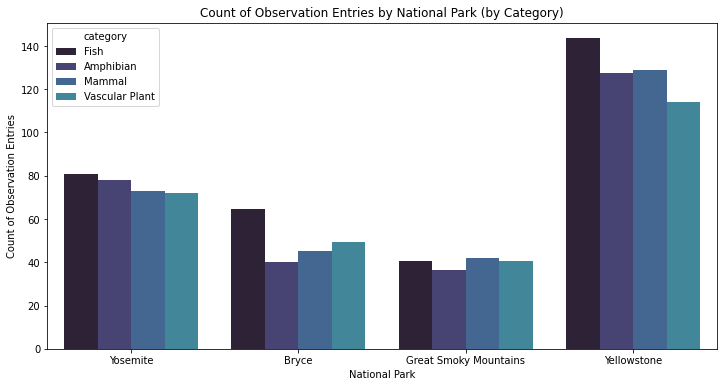

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='park_name', y='observations', hue='category', data=threatened_df, ci=None, palette=sns.color_palette("mako"))
plt.xlabel('National Park')
plt.ylabel('Count of Observation Entries')
plt.title('Count of Observation Entries by National Park (by Category)')
plt.show()
plt.clf()

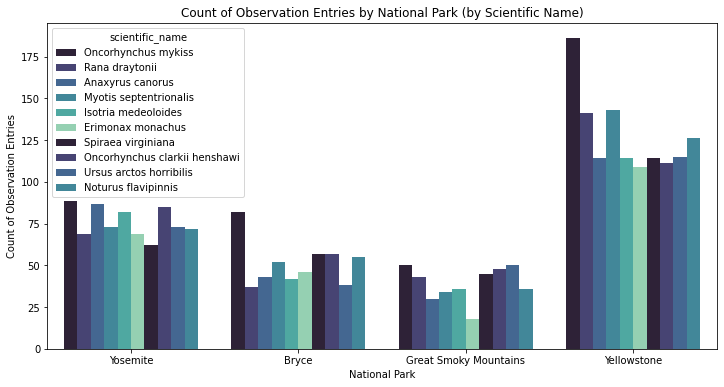

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='park_name', y='observations', hue='scientific_name', data=threatened_df, ci=None, palette=sns.color_palette("mako"))
plt.xlabel('National Park')
plt.ylabel('Count of Observation Entries')
plt.title('Count of Observation Entries by National Park (by Scientific Name)')
plt.show()
plt.clf()

## Checking association between data sets (Warning: Some Borrowed Ideas)

In [18]:
#Full disclosure, I found bits of the code in the next section from others completing this project and wanted to lear how it works
#Don't want anyone to think I figured this out without help =) / Credit to Madjidiaw on GitHub
print('\n\033[1mChecking relationship between category and conservation status\n\033[0m\n')
print(pd.crosstab(merged_df.category, merged_df.conservation_status))

print('\n\n\n\033[1mChecking relationship between category and conservation status (Normalized)\n\033[0m\n')
print(pd.crosstab(merged_df.category, merged_df.conservation_status, normalize=True))


Checking relationship between category and conservation status


conservation_status  Endangered  In Recovery  Not Endangered  \
category                                                       
Amphibian                     4            0             300   
Bird                         16           12            2016   
Fish                         12            0             476   
Mammal                       44           12             968   
Nonvascular Plant             0            0            1312   
Reptile                       0            0             304   
Vascular Plant                4            0           19376   

conservation_status  Species of Concern  Threatened  
category                                             
Amphibian                            16           8  
Bird                                320           0  
Fish                                 16          20  
Mammal                              168           8  
Nonvascular Plant                

In [23]:
from scipy.stats import f_oneway

species_of_concern = merged_df.observations[merged_df['conservation_status'] == 'Species of Concern']
endangered_species = merged_df.observations[merged_df['conservation_status'] == 'Endangered']
threatened_species = merged_df.observations[merged_df['conservation_status'] == 'Threatened']
in_recovery = merged_df.observations[merged_df['conservation_status'] == 'In Recovery']

fstat, pval = f_oneway(species_of_concern, endangered_species, threatened_species, in_recovery)
print('Result of Association Test Between Conservation Status and Observation: {}'
      .format(pval))

Result of Association Test Between Conservation Status and Observation: 2.318140273400388e-34


In [24]:
yellowstone = merged_df.observations[merged_df['park_name'] == 'Yellowstone']
bryce = merged_df.observations[merged_df['park_name'] == 'Bryce']
smoky = merged_df.observations[merged_df['park_name'] == 'Great Smoky Mountains']
yosemite = merged_df.observations[merged_df['park_name'] == 'Yosemite']

fstat, pval = f_oneway(yellowstone, bryce, smoky, yosemite)
print('Result of Association Test Between Park Names and Observation: {}'
      .format(pval))

Result of Association Test Between Park Names and Observation: 0.0


In [25]:
# Compare species group means with a type I error rate of 0.05
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def association_test_pairwise(numeric_value_column, categorical_value_column):
    """
    Run Tukey Range Test to examine the association between the observations 
    and the parks using type I error rate of 0.05
    """
    tukey_results = pairwise_tukeyhsd(numeric_value_column, 
                                      categorical_value_column, 0.05)
    print('Result of Species Association within {}: \n \n {}'
          .format(categorical_value_column.name, tukey_results))

# Compare groups within conservation status
association_test_pairwise(merged_df.observations, merged_df.conservation_status)

print('I don\'t quite know how this works yet, but it appears the reject column coming out as False proves there is an association between group 1 and group2 in the chart')

Result of Species Association within conservation_status: 
 
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2       meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------
        Endangered        In Recovery  43.8792 0.0526  -0.2986  88.0569  False
        Endangered     Not Endangered  99.2002  0.001  77.9436 120.4568   True
        Endangered Species of Concern  84.4509  0.001   62.099 106.8028   True
        Endangered         Threatened  31.9739 0.1028   -3.653  67.6007  False
       In Recovery     Not Endangered  55.3211  0.001  16.5558  94.0863   True
       In Recovery Species of Concern  40.5717 0.0397   1.1952  79.9482   True
       In Recovery         Threatened -11.9053    0.9 -60.0735  36.2629  False
    Not Endangered Species of Concern -14.7493  0.001 -21.8682  -7.6305   True
    Not Endangered         Threatened -67.2264  0.001 -95.8679 -38.58

There is evidence of association between:
- Endangered and In Recovery
- Endangered and Threatened
- In Recovery and Threatened

In [27]:
# Compare groups within category of species 
association_test_pairwise(merged_df.observations, merged_df.category)

Result of Species Association within category: 
 
             Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------
        Amphibian              Bird   3.1944    0.9  -8.9493 15.3382  False
        Amphibian              Fish   1.7216    0.9 -12.7893 16.2325  False
        Amphibian            Mammal  -1.4691    0.9 -14.3104 11.3722  False
        Amphibian Nonvascular Plant   5.7304 0.8174  -6.9736 18.4345  False
        Amphibian           Reptile   4.0235    0.9 -12.1198 20.1667  False
        Amphibian    Vascular Plant   5.5072 0.7674  -5.9678 16.9821  False
             Bird              Fish  -1.4728    0.9 -11.4243  8.4786  False
             Bird            Mammal  -4.6635 0.4923 -11.9687  2.6416  False
             Bird Nonvascular Plant    2.536    0.9   -4.525   9.597  False
             Bird           Reptile  

Vascular Plants and Mallals show significant differences from this analysis

In [28]:
# Compare National Parks observations
association_test_pairwise(merged_df.observations, merged_df.park_name)

Result of Species Association within park_name: 
 
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                group2        meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------
                Bryce Great Smoky Mountains -24.7235 0.001  -25.7007 -23.7463   True
                Bryce           Yellowstone  148.931 0.001  147.9538 149.9082   True
                Bryce              Yosemite  49.3385 0.001   48.3613  50.3157   True
Great Smoky Mountains           Yellowstone 173.6545 0.001  172.6773 174.6317   True
Great Smoky Mountains              Yosemite   74.062 0.001   73.0847  75.0392   True
          Yellowstone              Yosemite -99.5925 0.001 -100.5697 -98.6153   True
------------------------------------------------------------------------------------


This shows that there is no significant relationship between the observations and the park they are associated to, meaning the observations are independently recorded